# ECS Yapay Zekâ Uzmanlığı Eğitimi Uygulama Sınavı
📝 Yönerge
Bu sınavda Titanic veri setini kullanarak bir veri bilimcinin yaptığı gibi veriyi yükleyecek, temizleyecek, sorulara cevap arayacak ve görselleştireceksiniz.

Her sorunun altındaki kod hücresine gerekli Python kodunu yazınız.

Kodlarınızı çalıştırmayı ve çıktıları kontrol etmeyi unutmayınız.

Bazı sorularda ipuçları verilmiştir, bunları dikkate alınız.

## BÖLÜM 1: Veri Yükleme ve Genel Bakış

Soru 1: Gerekli kütüphaneleri (seaborn, pandas, matplotlib.pyplot) import edin.

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

Titanic veri setini yükleyin ve ilk 5 satırını ekrana yazdırın. (pd read csv sadece train veri setinde çalışın)

In [4]:
import pandas as pd
df=pd.read_csv("/kaggle/input/titanic/train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Soru 2: Veri setinin yapısal özelliklerini inceleyin.

Kaç satır ve sütun var?

Hangi sütunlarda eksik veriler (null) var? (İpucu: .info() ve .isnull().sum() metodları size yardımcı olabilir.)

In [6]:
df.shape 

(891, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# BÖLÜM 2: Veri Dedektifliği (Filtreleme ve Sorgulama)
Bu bölümde Pandas filtreleme yöntemlerini kullanarak veri setindeki gizli bilgileri açığa çıkaracaksınız.

Soru 3: Gemideki en yaşlı yolcuyu ve en genç yolcuyu (bebeği) bulun. Bu kişilerin tüm bilgilerini ekrana getirin. (İpucu: df[df['age'] == ...] kalıbını ve .max(), .min() fonksiyonlarını kullanabilirsiniz.)

In [9]:
df[df['Age']==df['Age'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [10]:
df[df['Age']==df['Age'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


Soru 4: "Zenginler Kulübü": Titanic'teki en pahalı bileti (fare) alan yolcular kimlerdir? Bu fiyata bilet alan kaç kişi var ve hepsi hayatta kalmış mı? (İpucu: Önce maksimum ücreti bulun, sonra buna göre filtreleyin.)

In [11]:
df['Fare'].max()

512.3292

In [12]:
max_fare=df['Fare'].max()

df[df['Fare']==max_fare]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Soru 5: "Bedava Yolcular": Bilet ücreti ödemeyen (fare == 0) yolcuları listeleyin. Bu kişiler genellikle hangi limandan binmişler? (İpucu: value_counts() fonksiyonunu kullanabilirsiniz.)

In [13]:
bedava_yolcular=df[df['Fare']==0]
display(bedava_yolcular)
print("Liman Dağılımı:")
print(bedava_yolcular['Embarked'].value_counts())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Liman Dağılımı:
Embarked
S    15
Name: count, dtype: int64


Soru 6: Trajik Bir İstatistik: 1. Sınıfta (pclass=1) seyahat etmesine rağmen hayatını kaybeden (survived=0) yolcuları filtreleyin. Bu durumda olan kaç kişi vardır? (İpucu: İki koşulu & operatörü ile bağlayın.)

In [14]:
kayiplar = df[(df['Pclass'] == 1) & (df['Survived'] == 0)]
display(kayiplar)
print("Toplam kayıp sayısı:", len(kayiplar))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S


Toplam kayıp sayısı: 80


Soru 7: "Yalnız Kurtlar": Gemide ne eşi/kardeşi (sibsp=0) ne de ebeveyni/çocuğu (parch=0) olan, yani tamamen yalnız seyahat eden yolcuların sayısını bulun. (İpucu: alone sütununu kullanabilir veya sibsp ve parch sütunlarını filtreleyebilirsiniz.)

In [15]:
yalniz_yolcular = df[(df['SibSp'] == 0) & (df['Parch'] == 0)]
print("Yalnız seyahat eden yolcu sayısı:", len(yalniz_yolcular))
display(yalniz_yolcular)

Yalnız seyahat eden yolcu sayısı: 537


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# BÖLÜM 3: Gruplama ve Analiz (Aggregation)
Soru 8: Yolcu sınıflarına (pclass) göre hayatta kalma oranlarını hesaplayın. Hangi sınıfın hayatta kalma şansı daha yüksek? (İpucu: groupby fonksiyonunu kullanın ve mean() alarak ortalamaya bakın.)

In [16]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Soru 9: Cinsiyete göre yaş ortalaması nedir? Kadınların mı yoksa erkeklerin mi yaş ortalaması daha büyüktür?

In [17]:
cinsiyet_yas_ortalamasi = df.groupby('Sex')['Age'].mean()
print("Cinsiyete göre yaş ortalamaları:")
print(cinsiyet_yas_ortalamasi)

Cinsiyete göre yaş ortalamaları:
Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


# BÖLÜM 4: Veri Görselleştirme (Seaborn)
Bu bölümde veriyi grafiklerle anlatmanız beklenmektedir.

Soru 10: Cinsiyete göre hayatta kalma sayılarını gösteren bir Sütun Grafiği (Count Plot) çizin. (İpucu: sns.countplot kullanın, hue parametresine 'survived' vererek kırılım yapın.

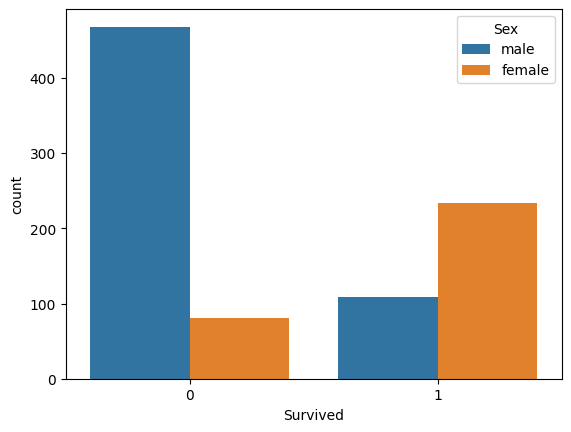

In [18]:
sns.countplot(data=df, x='Survived', hue='Sex');

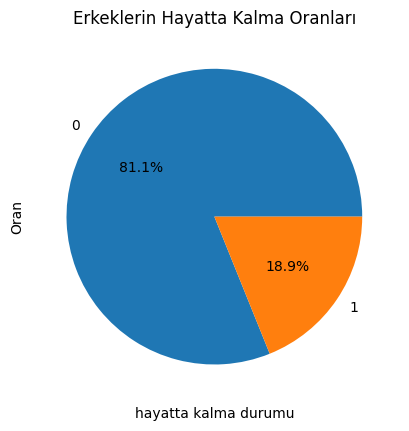

In [19]:
df_male=df[df['Sex']=='male']
df_male['Survived'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('hayatta kalma durumu')
plt.ylabel('Oran')
plt.title('Erkeklerin Hayatta Kalma Oranları')
plt.show()

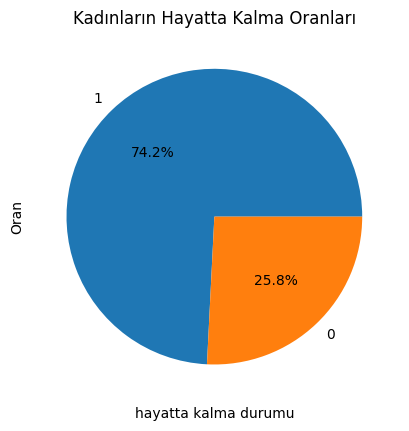

In [20]:
df_fmale=df[df['Sex']=='female']
df_fmale['Survived'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('hayatta kalma durumu')
plt.ylabel('Oran')
plt.title('Kadınların Hayatta Kalma Oranları')
plt.show()

Soru 11: Sınıflara (pclass) göre ödenen ücretin (fare) dağılımını gösteren bir Kutu Grafiği (Box Plot) çizin. (İpucu: Hangi sınıfta bilet fiyatları daha değişken? sns.boxplot kullanın.)

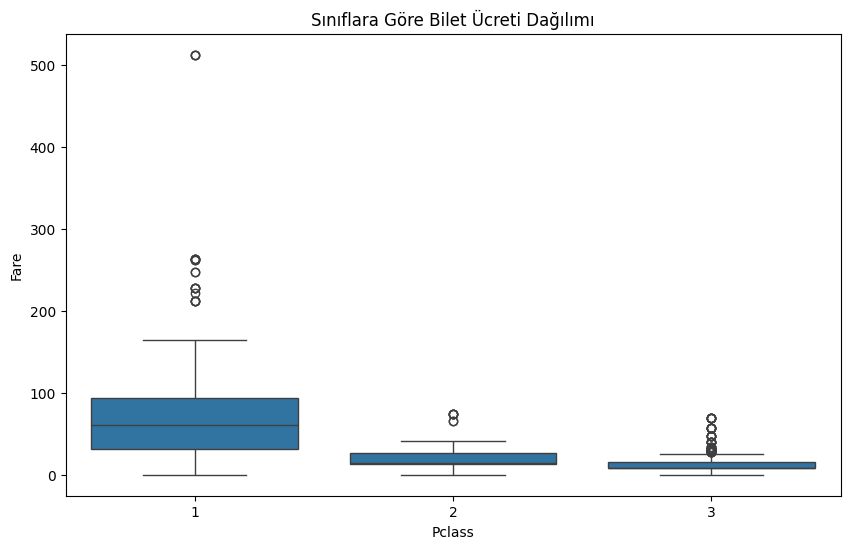

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Sınıflara Göre Bilet Ücreti Dağılımı')
plt.show()

Soru 12: Sayısal değişkenler arasındaki ilişkiyi görmek için bir Korelasyon Isı Haritası (Heatmap) oluşturun. (İpucu: Önce df.corr(numeric_only=True) ile korelasyon matrisini oluşturun, sonra sns.heatmap ile çizin. annot=True yapmayı unutmayın.)

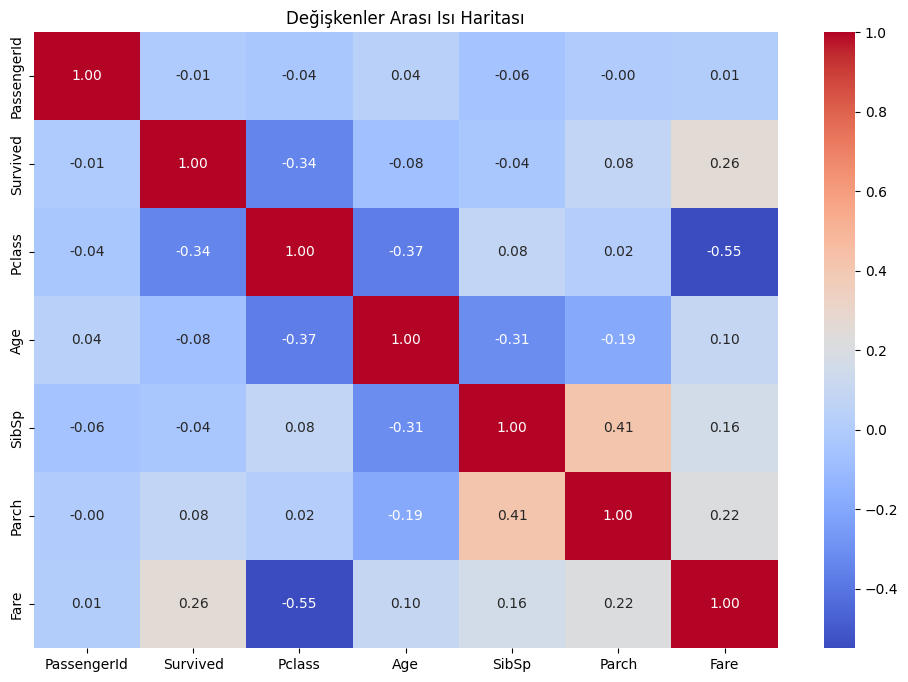

In [22]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Değişkenler Arası Isı Haritası')
plt.show()

BONUS SORU (İsteğe Bağlı)
Soru 13: "Cherbourg" (C) limanından binen, 1. sınıfta seyahat eden ve hayatta kalan kadın yolcuların yaş dağılımını bir Histogram ile gösterin veya sadece bilgilerini listeleyin.

In [23]:
#